<a href="https://colab.research.google.com/github/soton371/k-means-algorithm/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Step 1: Initialize cluster centroids randomly
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        
        for i in range(self.max_iter):
            # Step 2: Assign each data point to the nearest cluster centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            
            # Step 3: Update cluster centroids by taking the mean of all data points assigned to each cluster
            for j in range(self.n_clusters):
                self.centroids[j] = X[labels == j].mean(axis=0)
                
        # Save final labels and distances
        self.labels_ = labels
        self.distances_ = distances[labels, np.arange(n_samples)]


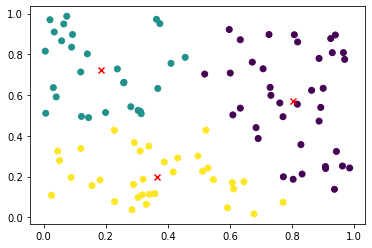

In [11]:
# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 2)

# Initialize and fit the k-means algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', color='r')
plt.show()
